<a href="https://colab.research.google.com/github/zerroukines/UniversalBankUsingSVC/blob/main/UniversalBankUsingSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **building an SVM classification model to predict if a customer is likely to accept a personal loan**

Dataset source: https://www.kaggle.com/datasets/vinod00725/svm-classification/

In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# Load and preprocess the dataset
data = pd.read_csv('/content/UniversalBank.csv')

X = data.drop(columns=['ID', 'Personal Loan'])
y = data['Personal Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
from sklearn.svm import SVC

In [5]:
# Step 3: Train the SVM model
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
# Evaluate the model
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.953
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       895
           1       0.91      0.61      0.73       105

    accuracy                           0.95      1000
   macro avg       0.94      0.80      0.85      1000
weighted avg       0.95      0.95      0.95      1000



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 800x600 with 0 Axes>

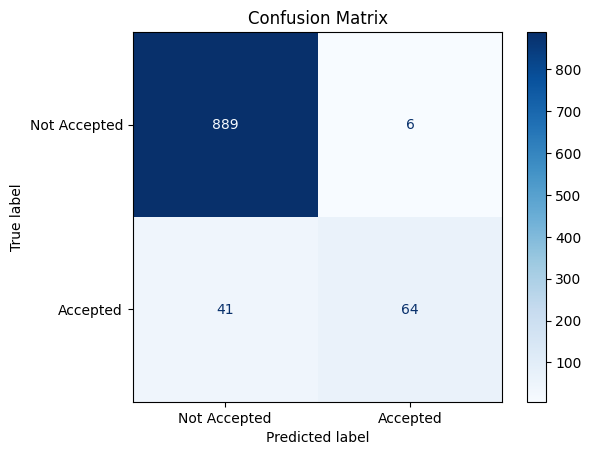

In [9]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not Accepted', 'Accepted'])
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

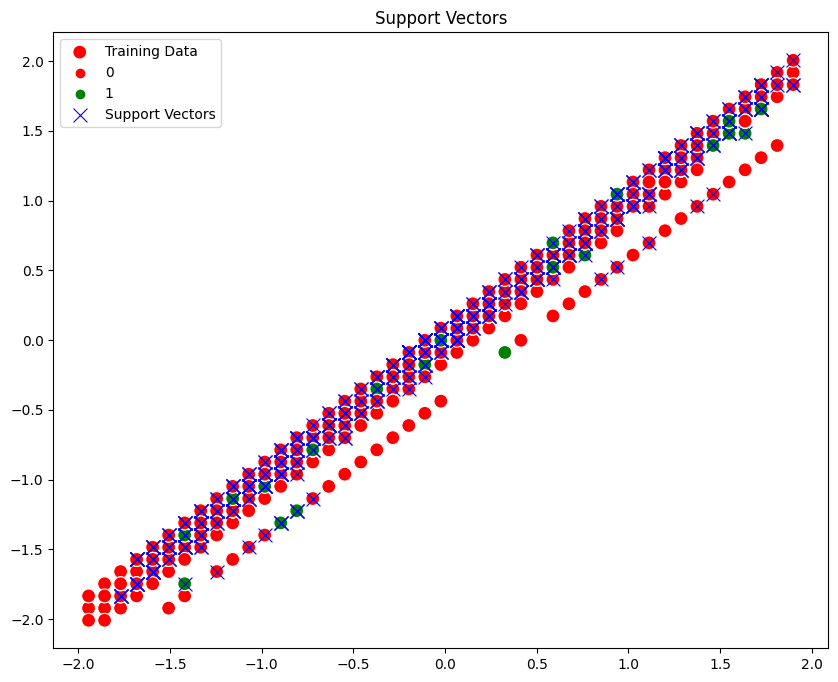

In [10]:
# Visualize the support vectors
support_vectors = svm_classifier.support_vectors_

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=['red', 'green'], marker='o', s=100, label='Training Data')
sns.scatterplot(x=support_vectors[:, 0], y=support_vectors[:, 1], color='blue', marker='x', s=100, label='Support Vectors')
plt.title('Support Vectors')
plt.legend()
plt.show()

In [11]:
# Create a new data sample for testing
new_data = pd.DataFrame({
    'Age': [30],
    'Experience': [10],
    'Income': [50],
    'ZIP Code': [90210],
    'Family': [2],
    'CCAvg': [2.0],
    'Education': [2],
    'Mortgage': [0],
    'Securities Account': [0],
    'CD Account': [0],
    'Online': [1],
    'CreditCard': [1]
})

# Standardize the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# Make predictions on the new data
prediction = svm_classifier.predict(new_data_scaled)

# Interpret the prediction
if prediction[0] == 1:
    print("The model predicts that the customer is likely to accept a personal loan.")
else:
    print("The model predicts that the customer is not likely to accept a personal loan.")


The model predicts that the customer is not likely to accept a personal loan.
